In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
df_d = pd.read_csv('data.csv')
df_d

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


Converting string values to integer encoding

In [3]:
df_d['Gender'], unique_make = pd.factorize(df_d['Gender'])
df_d['Polyuria'], unique_make = pd.factorize(df_d['Polyuria'])
df_d['Polydipsia'], unique_make = pd.factorize(df_d['Polydipsia'])
df_d['sudden weight loss'], unique_make = pd.factorize(df_d['sudden weight loss'])
df_d['weakness'], unique_make = pd.factorize(df_d['weakness'])
df_d['Polyphagia'], unique_make = pd.factorize(df_d['Polyphagia'])
df_d['Genital thrush'], unique_make = pd.factorize(df_d['Genital thrush'])
df_d['visual blurring'], unique_make = pd.factorize(df_d['visual blurring'])
df_d['Itching'], unique_make = pd.factorize(df_d['Itching'])
df_d['Irritability'], unique_make = pd.factorize(df_d['Irritability'])
df_d['delayed healing'], unique_make = pd.factorize(df_d['delayed healing'])
df_d['partial paresis'], unique_make = pd.factorize(df_d['partial paresis'])
df_d['muscle stiffness'], unique_make = pd.factorize(df_d['muscle stiffness'])
df_d['Alopecia'], unique_make = pd.factorize(df_d['Alopecia'])
df_d['Obesity'], unique_make = pd.factorize(df_d['Obesity'])
df_d['class'], unique_make = pd.factorize(df_d['class'])

In [4]:
df_d

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,58,0,0,1,0,0,0,0,1,1,0,1,1,1,0,1,0
2,41,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0
3,45,0,0,1,1,0,1,1,0,0,0,0,0,1,1,1,0
4,60,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,0,1,1,1,0,0,0,0,0,1,1,1,1,0
516,48,1,1,0,1,0,1,0,0,0,1,0,1,1,1,1,0
517,58,1,1,0,1,0,1,0,1,1,0,1,1,0,1,0,0
518,32,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1


make Positive = 1, Negative = 0

In [5]:
df_d['class'] = df_d['class'].replace({0: 1, 1: 0})

In [6]:
df_d

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,58,0,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1
2,41,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1
3,45,0,0,1,1,0,1,1,0,0,0,0,0,1,1,1,1
4,60,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,0,1,1,1,0,0,0,0,0,1,1,1,1,1
516,48,1,1,0,1,0,1,0,0,0,1,0,1,1,1,1,1
517,58,1,1,0,1,0,1,0,1,1,0,1,1,0,1,0,1
518,32,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


In [7]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

check the missing value

In [8]:
# Calculate the percentage of missing values for each column
missing_percentage = (df_d.isnull().sum() / len(df_d)) * 100

# Display the percentage of missing values
print(missing_percentage)

Age                   0.0
Gender                0.0
Polyuria              0.0
Polydipsia            0.0
sudden weight loss    0.0
weakness              0.0
Polyphagia            0.0
Genital thrush        0.0
visual blurring       0.0
Itching               0.0
Irritability          0.0
delayed healing       0.0
partial paresis       0.0
muscle stiffness      0.0
Alopecia              0.0
Obesity               0.0
class                 0.0
dtype: float64


this is no missing value

correlation matrix

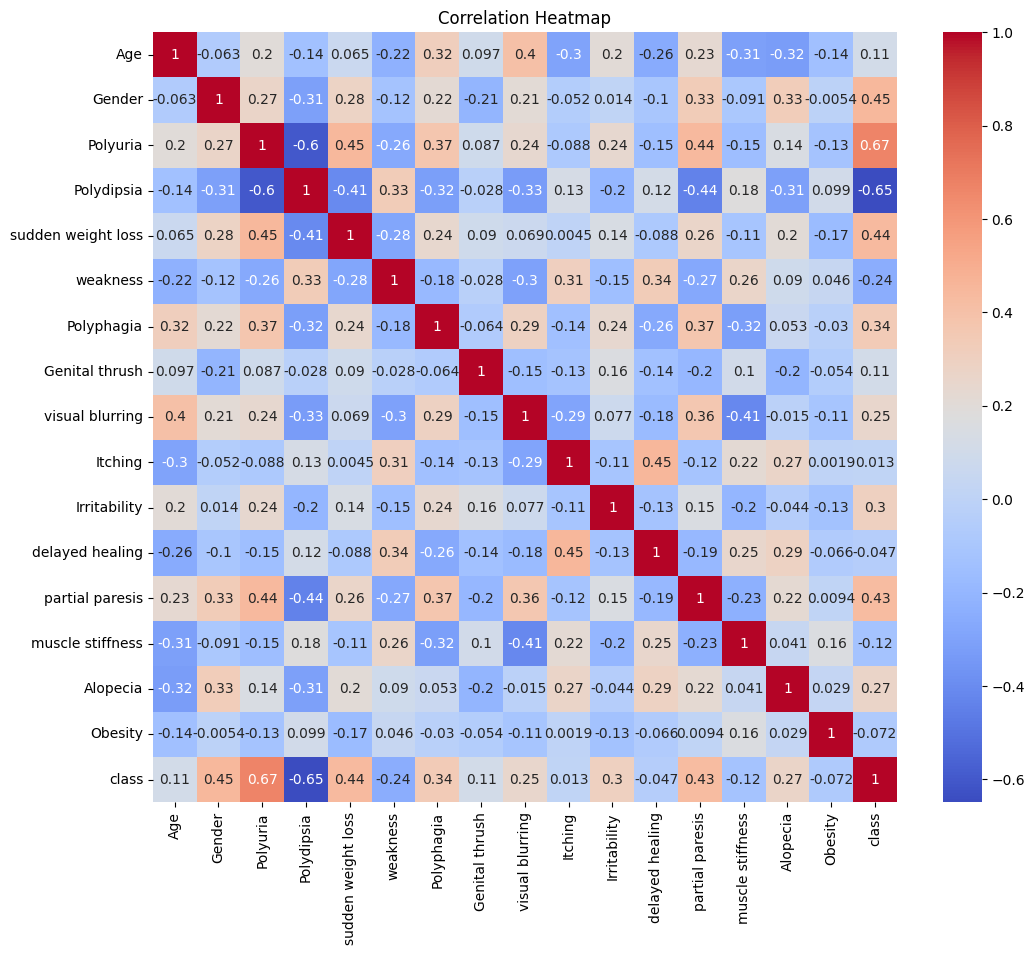

In [9]:
#the correlation matrix
correlation_matrix = df_d.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

fig = plt.gcf()
fig.set_size_inches(12, 10)
plt.show()

from the heatmap, we can find that only Gender,Polyuria, Polydipsia,sudden weight loss, weakness, Polyphagia, visual blurring, Irritability, partial paresis, Alopecia have relation with class

#static analysis

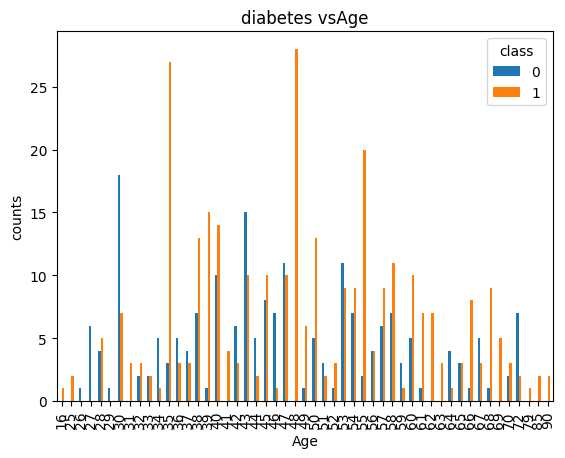

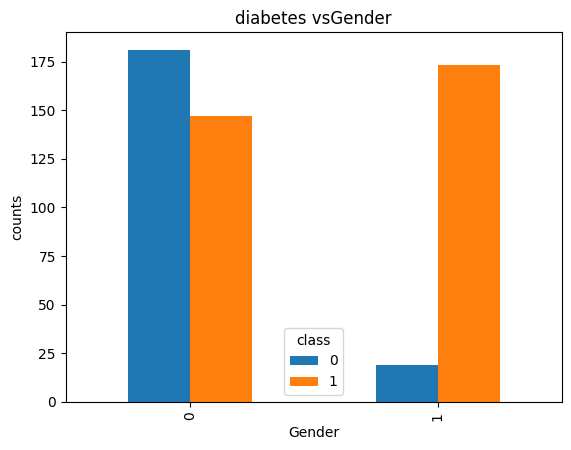

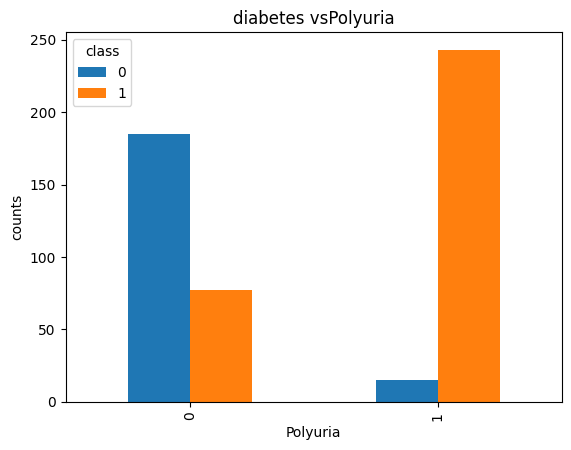

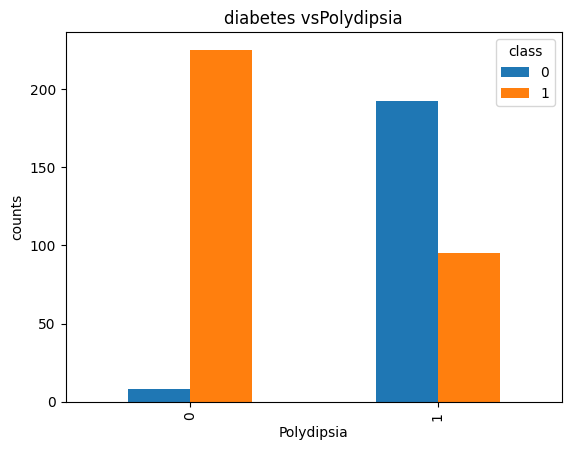

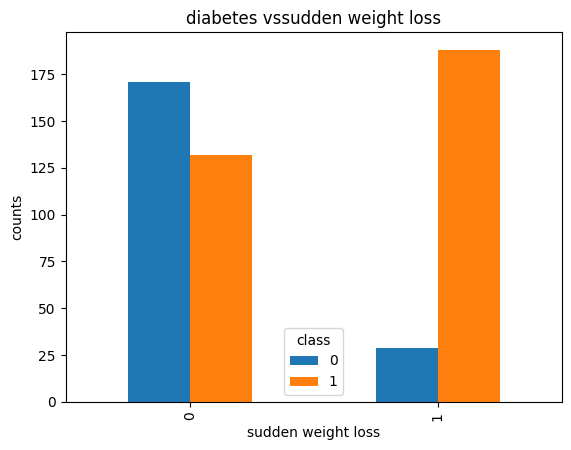

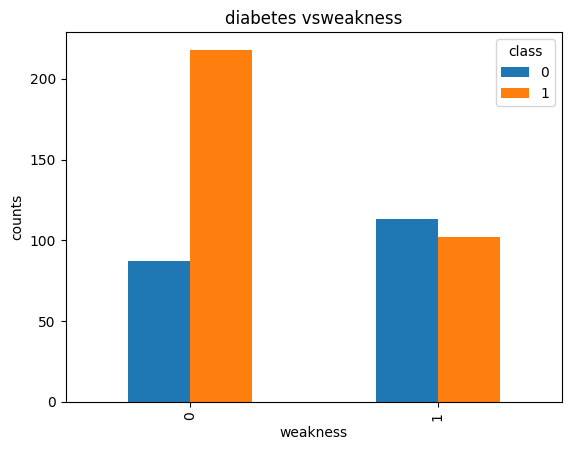

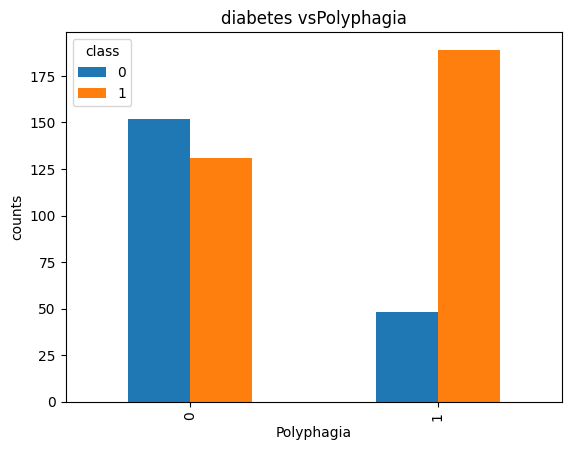

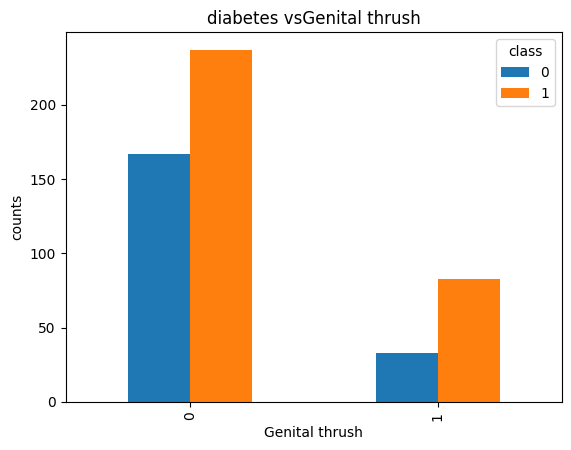

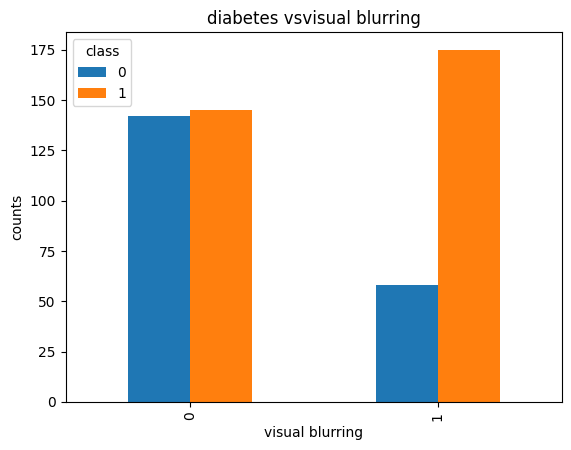

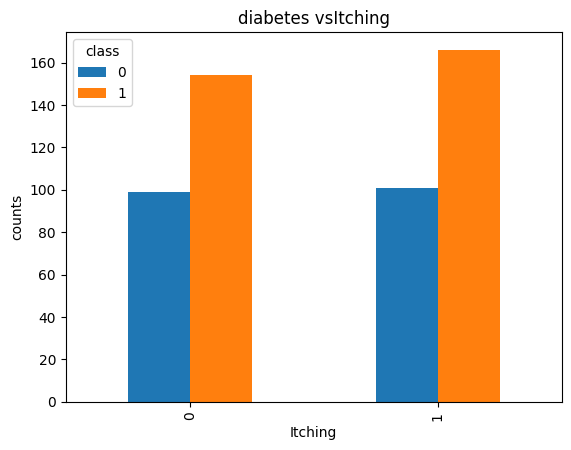

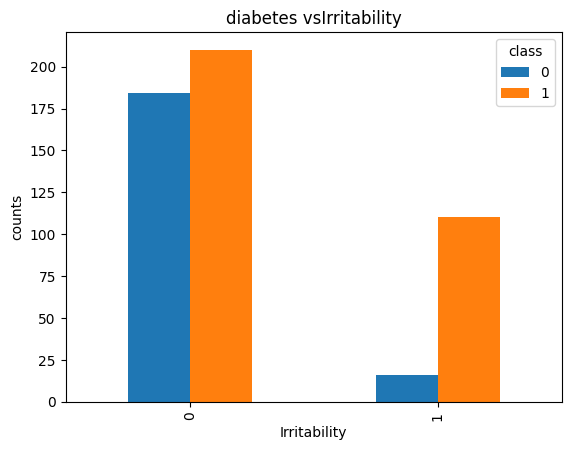

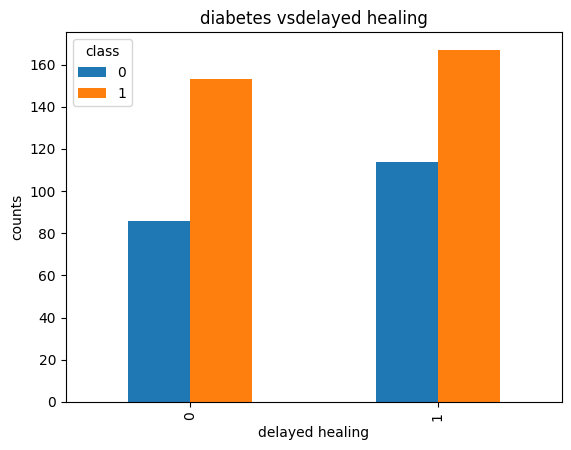

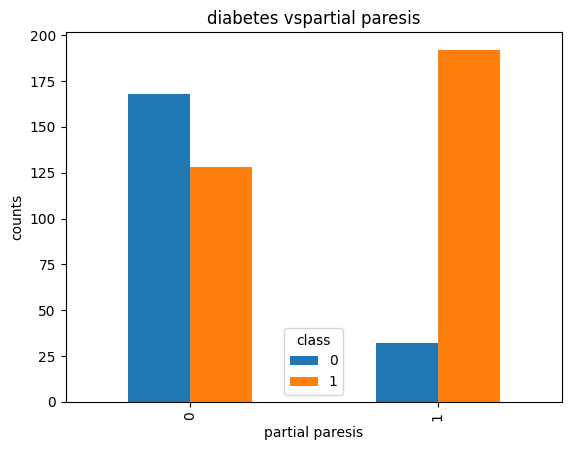

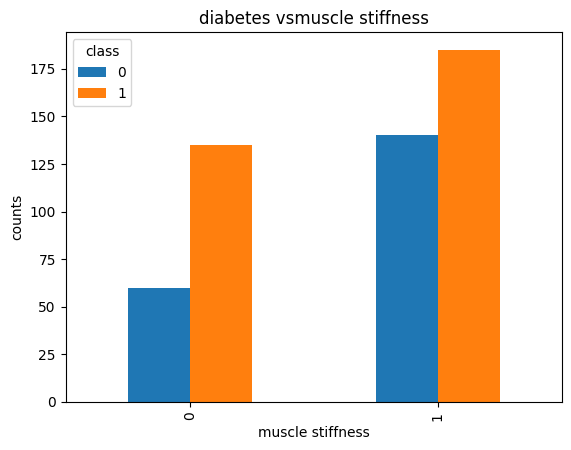

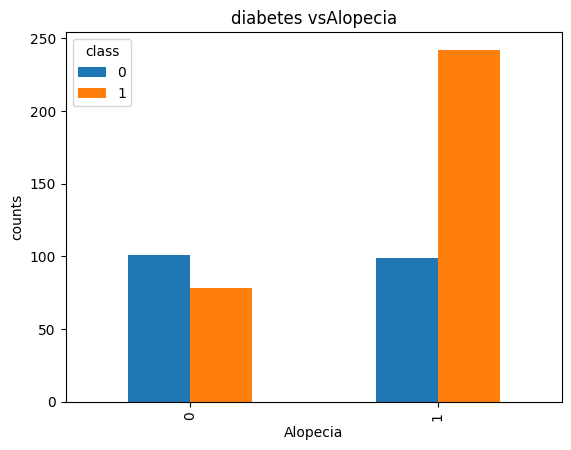

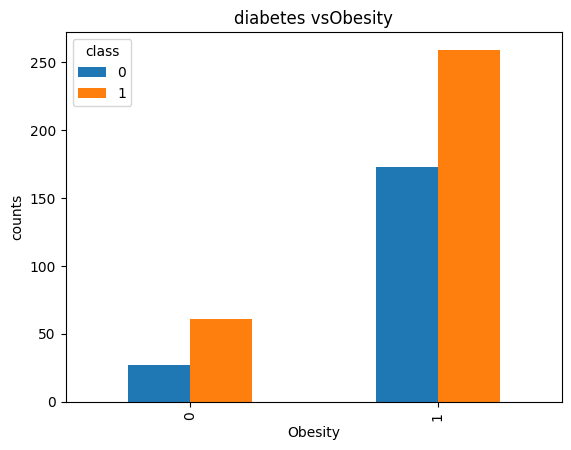

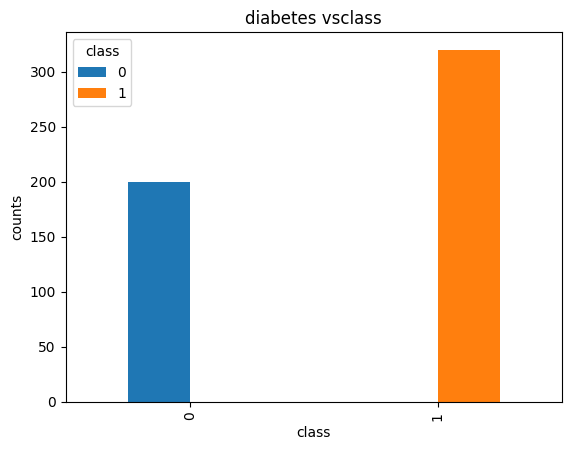

In [10]:
for i in df_d.columns:
    pd.crosstab(df_d[i],df_d['class']).plot(kind='bar')
    plt.title('diabetes vs'+ i)
    plt.xlabel(i)
    plt.ylabel('counts')

from the heatmap, we can find that only Gender,Polyuria, Polydipsia,sudden weight loss, weakness, Polyphagia, visual blurring, Irritability, partial paresis, Alopecia have relation with class
so i need to take out this variables

In [11]:
selected_columns = ['Gender', 'Polyuria' , 'Polydipsia' , 'sudden weight loss' , 'weakness' , 'Polyphagia' , 'visual blurring'  , 'Irritability' , 'partial paresis' , 'Alopecia' , 'class' ]
subset_df = df_d[selected_columns]

In [12]:
subset_df

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Irritability,partial paresis,Alopecia,class
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,1,0,1,0,1
2,0,1,1,0,0,1,0,0,0,0,1
3,0,0,1,1,0,1,0,0,0,1,1
4,0,1,0,1,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
515,1,1,0,1,1,1,0,0,1,1,1
516,1,1,0,1,0,1,0,1,1,1,1
517,1,1,0,1,0,1,1,0,1,1,1
518,1,0,1,0,0,0,1,0,0,0,0


In [13]:

X = subset_df.drop("class", axis=1)
y = subset_df["class"]

# Get feature name
feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training logistic regression models
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


train_predictions = model.predict(X_train_scaled)

# Calculate the accuracy on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training set accuracy:", train_accuracy)

# check characteristic coefficient
coefficients = model.coef_
coefficients_dict = dict(zip(feature_names, coefficients[0]))


print("characteristic coefficient:")
for feature, coefficient in coefficients_dict.items():
    print(feature, ":", coefficient)

test_predictions = model.predict(X_test_scaled)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Set Accuracy:", test_accuracy)


Training set accuracy: 0.9086538461538461
characteristic coefficient:
Gender : 1.3613913445456651
Polyuria : 1.4177216043046181
Polydipsia : -1.543194163049861
sudden weight loss : 0.5408074178690784
weakness : -0.09081696509451485
Polyphagia : 0.07127860260180865
visual blurring : -0.24489591717791445
Irritability : 0.7613699502927845
partial paresis : 0.503197835337023
Alopecia : 0.40248752617372924
Test Set Accuracy: 0.8942307692307693


In [24]:
# pensonel input data 
input_data_point = [[0, 1, 0, 0, 1, 1, 1, 0, 0, 0]]

# Predicting the probability of disease
predicted_proba = model.predict_proba(scaler.transform(input_data_point))

# print("Predicting the probability of disease:", predicted_proba[:,1])
pre_r = predicted_proba[:,1]
if pre_r < 0.05 :
    print("Predicting the probability of disease: no")
elif (pre_r >= 0.05) and (pre_r < 0.3) :
    print("Predicting the probability of disease: low")
elif (pre_r >= 0.3) and (pre_r < 0.6) :
    print("Predicting the probability of disease: middle")
elif (pre_r >= 0.6) and (pre_r < 0.85) :
    print("Predicting the probability of disease: high")
else:
    print("Predicting the probability of disease: very high")

Predicting the probability of disease: very high


d:\soft\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:
# Recommendations corresponding to feature names
suggestions = {
    "Gender": "Gender is usually not a direct factor causing diabetes. However, women may face specific health challenges after developing diabetes, such as gestational diabetes. It is recommended to closely monitor your health condition and undergo regular check-ups.",
    "Polyuria": "This may be caused by high blood sugar levels, as the kidneys attempt to excrete excess glucose through urine. It is recommended to control blood sugar levels, avoid consuming too many sugary drinks and foods, and drink plenty of water to maintain body hydration.",
    "Polydipsia": "Polydipsia is usually caused by dehydration due to polyuria. It is important to replenish sufficient water to maintain body hydration. However, if polydipsia persists and occurs with other symptoms, medical attention should be sought as soon as possible.",
    "Sudden weight loss": "Sudden weight loss may be due to high blood sugar levels causing the body to be unable to effectively utilize glucose, resulting in the consumption of fat and muscle tissue. It is recommended to maintain a balanced diet and ensure adequate intake of nutrients.",
    "Weakness": "High blood sugar levels can lead to insufficient energy supply, resulting in weakness. Regular exercise, a balanced diet, adequate sleep, and avoiding overwork are key to alleviating weakness.",
    "Polyphagia": "Polyphagia occurs because the body cannot effectively utilize glucose, leading to increased hunger. It is recommended to choose low-GI (glycemic index) foods, such as whole grains, vegetables, and healthy proteins, to control blood sugar fluctuations and reduce the tendency to overeat.",
    "Visual blurring": "High blood sugar levels can affect the moisture balance of the eyes, leading to retinal edema and blurred vision. Regular eye examinations, controlling blood sugar levels, and avoiding prolonged eye strain are recommended.",
    "Irritability": "High blood sugar levels can affect the function of the nervous system, leading to mood swings. Maintaining a regular lifestyle, including adequate sleep, exercise, and healthy stress management techniques, can help alleviate irritability.",
    "Partial paresis": "High blood sugar levels can damage the nervous system, leading to partial paralysis. It is recommended to control blood sugar levels, maintain physical activity, avoid maintaining one posture for a long time, and undergo regular neurological examinations.",
    "Alopecia": "High blood sugar levels can affect the health of hair follicles, leading to hair loss. It is recommended to maintain healthy scalp and hair care habits, consume sufficient nutrients, and promote healthy hair growth."
}


# Output feature names and corresponding recommendations
sorted_features = sorted(zip(feature_names, abs(model.coef_[0])), key=lambda x: x[1], reverse=True)
for feature_name, coefficient in sorted_features:
    if model.coef_[0][feature_names.tolist().index(feature_name)] > 0 and input_data_point[0][feature_names.tolist().index(feature_name)] == 1:
        print("Feature Name:", feature_name)
        # print("Characterization coefficients:", model.coef_[0][feature_names.tolist().index(feature_name)])
        # print("Corresponds to the variable input value:", input_data_point[0][feature_names.tolist().index(feature_name)])
        print("Recommendation:", suggestions.get(feature_name, "No recommendation at this time"))
        print()
    elif model.coef_[0][feature_names.tolist().index(feature_name)] < 0 and input_data_point[0][feature_names.tolist().index(feature_name)] == 0:
        print("Feature Name:", feature_name)
        # print("Characterization coefficients:", model.coef_[0][feature_names.tolist().index(feature_name)])
        # print("Corresponds to the variable input value:", input_data_point[0][feature_names.tolist().index(feature_name)])
        print("Recommendation:", suggestions.get(feature_name, "No recommendation at this time"))
        print()

Feature Name: Polydipsia
Recommendation: Polydipsia is usually caused by dehydration due to polyuria. It is important to replenish sufficient water to maintain body hydration. However, if polydipsia persists and occurs with other symptoms, medical attention should be sought as soon as possible.

Feature Name: Polyuria
Recommendation: This may be caused by high blood sugar levels, as the kidneys attempt to excrete excess glucose through urine. It is recommended to control blood sugar levels, avoid consuming too many sugary drinks and foods, and drink plenty of water to maintain body hydration.

Feature Name: Polyphagia
Recommendation: Polyphagia occurs because the body cannot effectively utilize glucose, leading to increased hunger. It is recommended to choose low-GI (glycemic index) foods, such as whole grains, vegetables, and healthy proteins, to control blood sugar fluctuations and reduce the tendency to overeat.

